In [2]:
using AutomotiveDrivingModels
using AutoViz
using LsqFit
using Reactive, Interact
using EzXML
using AutoUrban

## Construction Segment by Segment

In [3]:
#Initialize
roadway = Roadway();

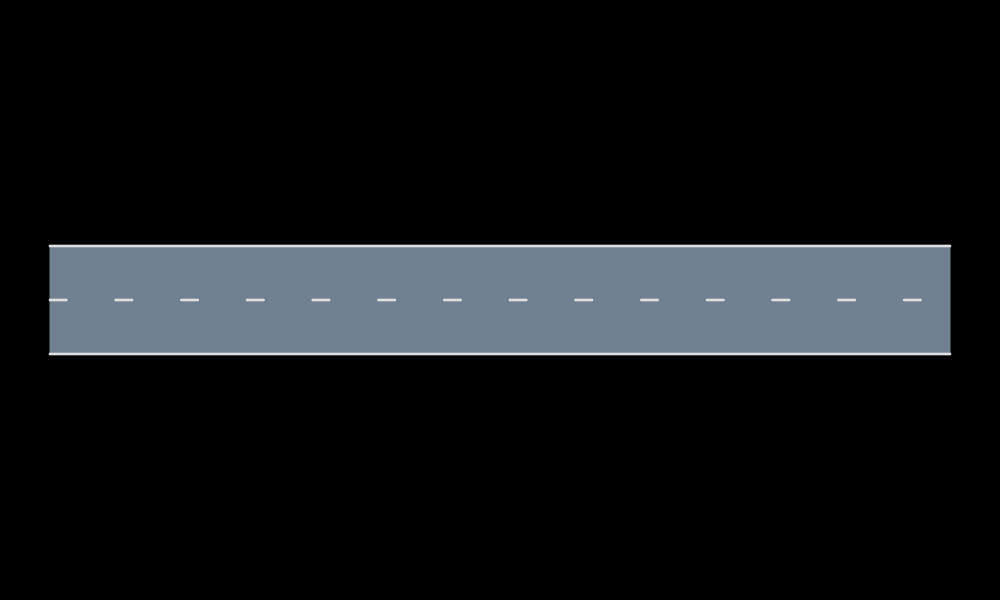

In [4]:
#Add one straight segment
origin = VecSE2(0.0,0.0,0.0) 
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
roadway

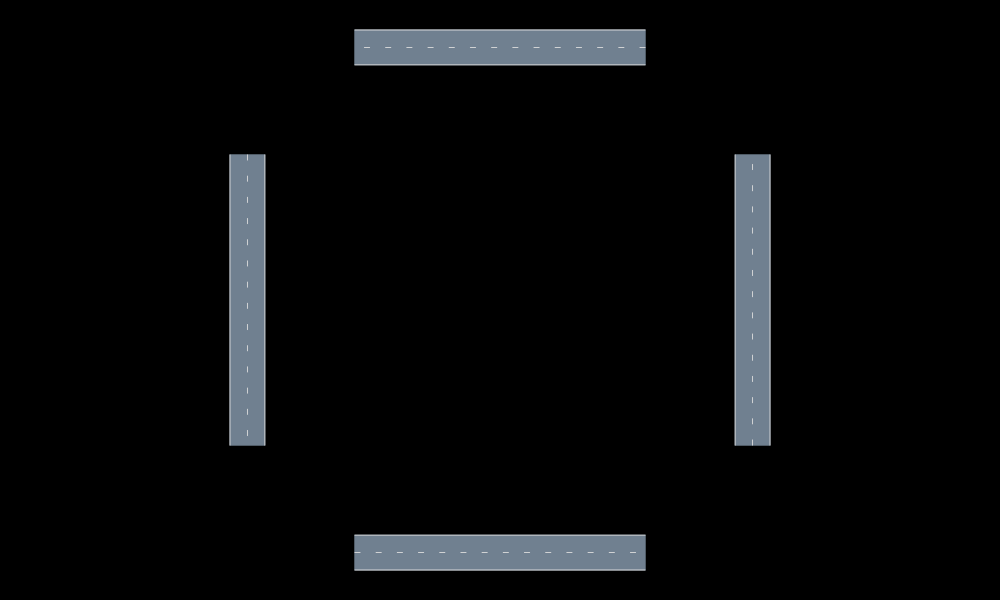

In [5]:
#Add more segments
origin = VecSE2(70.0,20.0,pi/2)
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(50.0,90.0,-pi)
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(-20.0,70.0,1.5*pi)
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
roadway

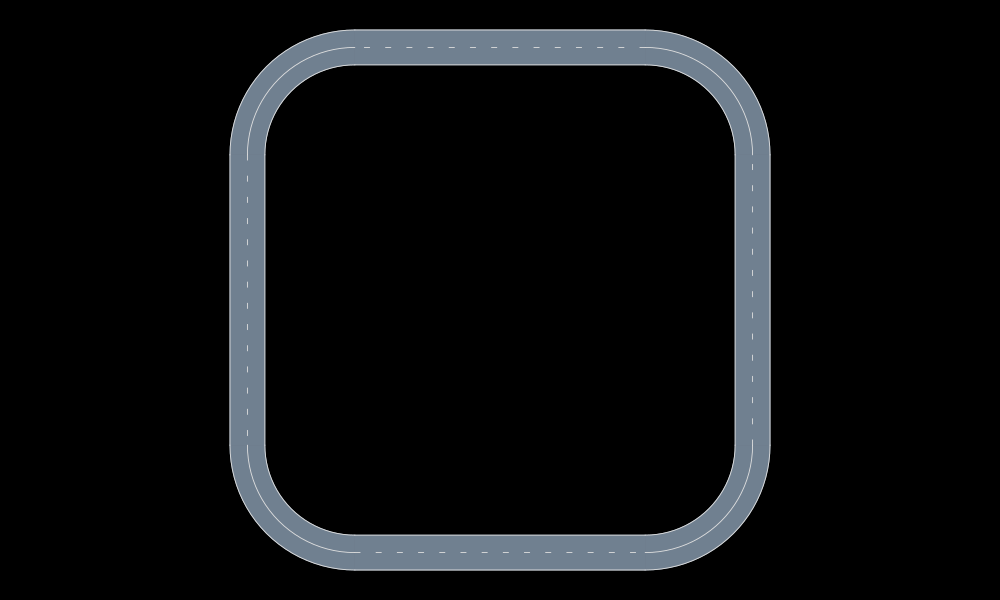

In [6]:
#Connect the segments
connect_two_seg!(roadway.segments[1],roadway.segments[2],roadway)
connect_two_seg!(roadway.segments[2],roadway.segments[3],roadway)
connect_two_seg!(roadway.segments[3],roadway.segments[4],roadway)
connect_two_seg!(roadway.segments[4],roadway.segments[1],roadway)
roadway

## Add Complex Connections (Intersection)

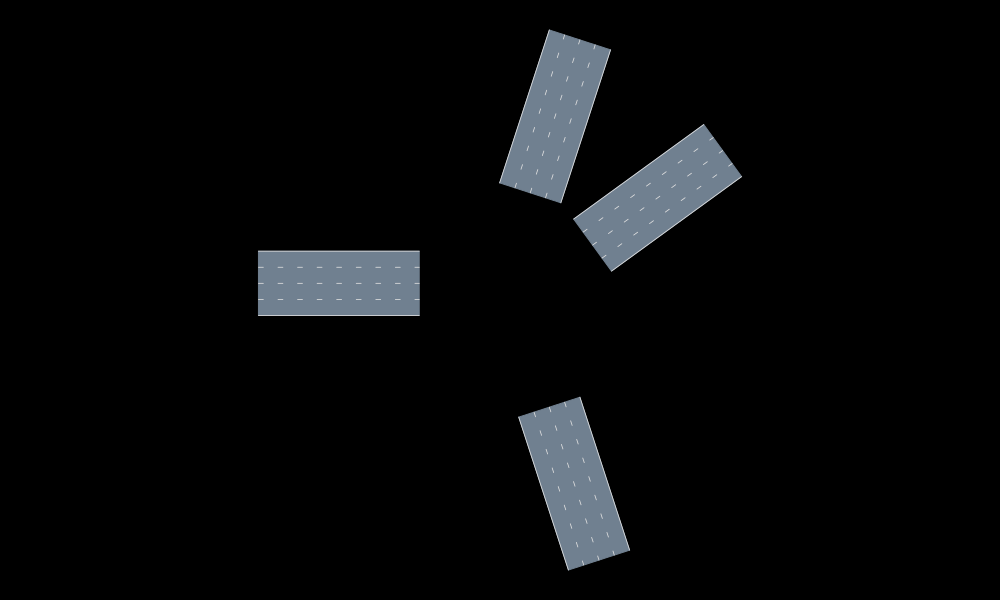

In [10]:
#Add segments
roadway = Roadway()
origin = VecSE2(-50.0,0.0,0.0)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(0.0,-20.0,-0.4*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(15.0,8.0,0.2*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(5.0,20.0,0.4*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
roadway

In [11]:
#Specify connections
#A Junction contains several Connections
#Connection(1,3) means connect all lanes from segment 1 to segment 3
#Connection(1,2,0,[(1,1),(2,2)]) means connect segment 1 and 2 from lane 1 in segment 1 to lane 2 in segment 2,
#lane 2 in segment 1 to lane 2 in segment2
junctions=[Junction([Connection(1,2,0,[(1,1),(2,2)]),Connection(1,3),Connection(1,4)])]

1-element Array{AutoUrban.Junction,1}:
 AutoUrban.Junction(AutoUrban.Connection[AutoUrban.Connection(1,2,0,Tuple{Int64,Int64}[(1,1),(2,2)]),AutoUrban.Connection(1,3,0,Tuple{Int64,Int64}[]),AutoUrban.Connection(1,4,0,Tuple{Int64,Int64}[])])

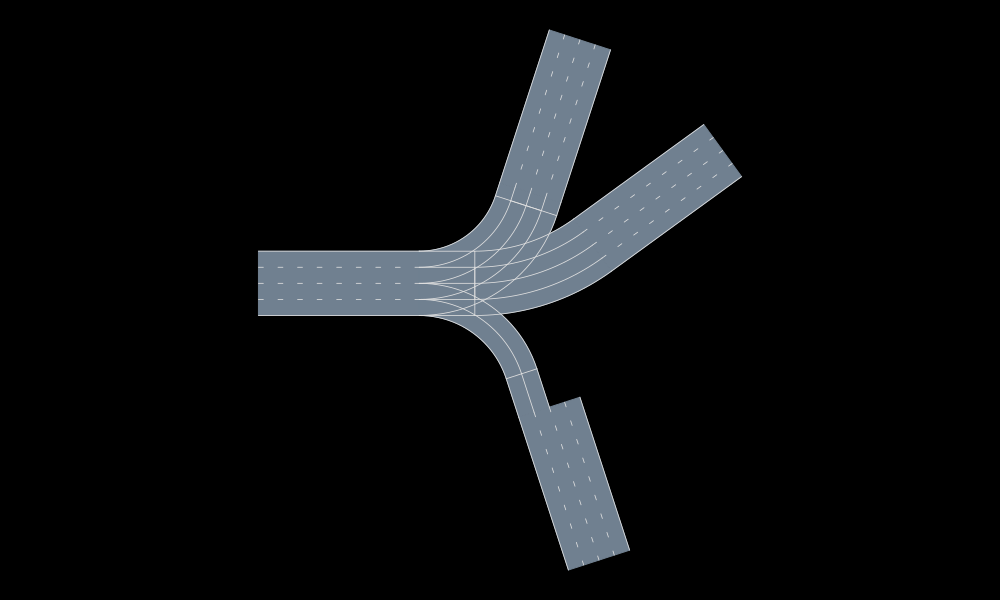

In [12]:
#Add all junctions
for junction in junctions
    add_junction!(junction,roadway)
end
roadway

## Some other built-in functions

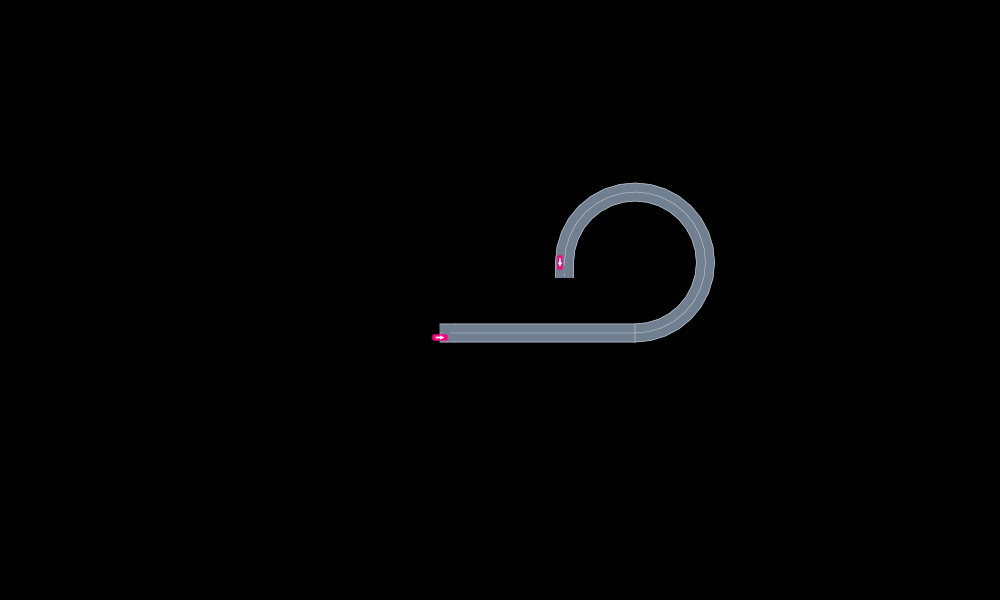

In [13]:
roadlength=5.0
origin1 = VecSE2(10.0,0.0,0.0)
origin2 = VecSE2(0.0+10*roadlength,0.0+5*roadlength,1.5*pi)
roadway=gen_connected_lanes(
    nlanes=2,
    origin1 = origin1,
    origin2 = origin2
)
scene = Frame(Entity{VehicleState, BicycleModel, Int},100)
id=1
push!(scene,Entity(VehicleState(origin1, roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
id += 1
push!(scene,Entity(VehicleState(origin2, roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
render(scene, roadway)

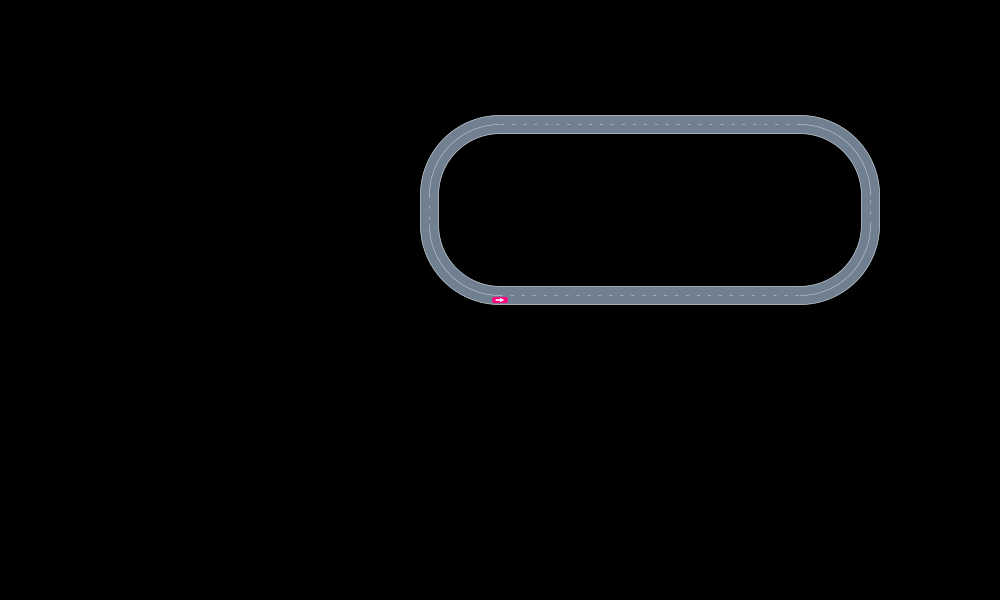

In [14]:
roadway=gen_loop_roadway(2)
scene = Frame(Entity{VehicleState, BicycleModel, Int},100)
origin1 = VecSE2(0.0,0.0,0.0)
id=1
push!(scene,Entity(VehicleState(origin1, roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
render(scene, roadway)